In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import db_utils, sqlalchemy
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from scipy.stats import fisher_exact
from scipy import stats
import matplotlib.pyplot as plt
import math
import os
import gzip
import re
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
import time
from collections import Counter
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
global_fontsize = 12
figsize = (3,3)
legend_fontsize = 8
#bbox_to_anchor =(1.0, 1.0)
import requests
save_path= '/Users/johgeist/Documents/AG_Luck/3did_project/revisions/revision_figures/'

In [2]:
# Function to count rows in a group
def count_rows(group):
    return group.shape[0]

In [3]:
# Connect to the MySQL database and read the preprocessed 3did into a DataFrame
eng = sqlalchemy.create_engine('mysql://', creator= db_utils.get_connection)
query= pd.read_sql_query('''select * from chopyan_db.3did_agg_DDI_PDB as df''', con= eng)
DDI_CS = pd.DataFrame(query)
DDI_CS

,DDI_type,PDB_ID,Chain_ID1,DomainID1,DomainName1,DomainStart1,DomainEnd1,Chain_ID2,DomainID2,DomainName2,DomainStart2,DomainEnd2,Score,Zscore,Chain1Iface,Chain2Iface,isInterchain
0,PF00001_PF00001,1gzm,A,PF00001,7tm_1,54,306,B,PF00001,7tm_1,54,306,26.18,7.82923,"E:196,E:196,E:196,E:196,E:197,N:199,E:201,E:20...","F:228,K:231,E:232,A:233,E:232,F:228,V:227,F:22...",1
1,PF00001_PF00001,1hzx,B,PF00001,7tm_1,54,246,B,PF00001,7tm_1,224,306,42.49,7.03413,"I:54,I:54,I:54,N:55,N:55,N:55,T:58,L:72,L:72,L...","V:300,P:303,V:304,A:299,V:300,P:303,Y:306,V:25...",0
2,PF00001_PF00001,1l9h,B,PF00001,7tm_1,54,246,B,PF00001,7tm_1,224,306,40.17,9.39410,"I:54,I:54,N:55,N:55,N:55,T:58,L:72,L:72,L:72,L...","V:300,P:303,A:299,V:300,P:303,Y:306,V:250,M:25...",0
3,PF00001_PF00001,2j4y,A,PF00001,7tm_1,54,306,B,PF00001,7tm_1,54,306,26.85,6.86878,"N:199,E:201,E:201,E:201,S:202,S:202,I:205,V:20...","Q:236,F:228,K:231,E:232,F:228,E:232,F:228,F:22...",1
4,PF00001_PF00001,2vt4,C,PF00001,7tm_1,58,343,D,PF00001,7tm_1,58,343,20.02,6.36751,"L:152,V:160,T:164,T:164,A:167,I:168,I:168,A:17...","F:315,A:206,A:206,A:210,W:181,A:210,I:214,W:18...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235443,PF18841_PF17433,1wmr,A,PF18841,B_solenoid_dext,321,354,A,PF17433,Glyco_hydro_49N,19,184,9.52,4.52235,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235444,PF18841_PF17433,1x0c,B,PF18841,B_solenoid_dext,321,354,B,PF17433,Glyco_hydro_49N,19,184,9.52,4.45403,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235445,PF18841_PF17433,2z8g,A,PF18841,B_solenoid_dext,321,354,A,PF17433,Glyco_hydro_49N,19,184,9.24,4.49346,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0
235446,PF18841_PF17433,3wwg,C,PF18841,B_solenoid_dext,321,354,C,PF17433,Glyco_hydro_49N,19,184,9.24,4.61412,"D:341,D:341,D:341,K:343,K:343,V:345,V:345,V:34...","R:153,S:182,P:183,S:101,S:182,Q:97,W:99,L:178,...",0


In [4]:
DDI_CS['PDB_ID']= DDI_CS['PDB_ID'].str.upper()

In [5]:
# Merge DDI_CS with additional protein information
df_protein_info = pd.read_csv('/Users/johgeist/Downloads/DDI_type_structure_level_interchain_homo_protein_whole_3did.csv', index_col=0)
df_protein_info= df_protein_info.drop(columns=['IsInterchain', 'Chain1', 'Chain2'])
DDI_CS= pd.merge(DDI_CS, df_protein_info, on=['DDI_type', 'PDB_ID'])

In [6]:
# Drop rows that relate to intrachain or homodimeric interfaces
DDI_inter= DDI_CS.drop(index= DDI_CS[DDI_CS['isInterchain'] == 0].index)
DDI_inter_hetero = DDI_inter.drop(index= DDI_inter[DDI_inter['HomoProtein'] == 1].index)

In [7]:
# Select one interface per DDI type as well as its metrics based on the highest 3did score
df_index_max_Score = DDI_inter_hetero.groupby('DDI_type').agg({'Score': 'idxmax'})
DDI_inter_hetero_grouped_max_Score = DDI_inter_hetero[DDI_inter_hetero.index.isin(df_index_max_Score.Score.tolist())]

In [8]:
DDI_inter_hetero_grouped_max_Score

,DDI_type,PDB_ID,Chain_ID1,DomainID1,DomainName1,DomainStart1,DomainEnd1,Chain_ID2,DomainID2,DomainName2,...,DomainEnd2,Score,Zscore,Chain1Iface,Chain2Iface,isInterchain,HomoDDI,UniProt1,UniProt2,HomoProtein
72,PF00001_PF00048,5UIW,A,PF00001,7tm_1,47,297,B,PF00048,IL8,...,65,13.26,5.101720,"Y:89,Q:170,Q:170,K:171,K:171,E:172,E:172,E:172...","Q:8,F:28,Y:29,E:26,F:28,Q:8,S:9,F:28,S:31,Q:48...",1,0,"P51681,P00268",P13501,0
82,PF00001_PF00085,6H7O,B,PF00001,7tm_1,58,343,F,PF00085,Thioredoxin,...,105,1.57,1.963520,"V:103,V:103,R:104,R:104,R:104,R:104,R:104","G:51,K:52,D:47,E:48,Y:49,Q:50,G:51",1,0,P07700,P0AA25,0
84,PF00001_PF00087,6WJC,A,PF00001,7tm_1,42,418,C,PF00087,Toxin_TOLIP,...,64,15.76,5.828060,"Y:82,W:164,W:164,L:167,L:167,V:168,V:168,V:168...","R:34,I:9,W:10,W:10,F:11,I:9,W:10,F:11,P:12,R:4...",1,0,"P11229,D9IEF7",Q8QGR0,0
85,PF00001_PF00322,5GLH,A,PF00001,7tm_1,107,387,B,PF00322,Endothelin,...,21,31.19,7.365980,"I:157,N:158,N:158,N:158,K:161,K:161,K:161,K:16...","I:20,I:19,I:20,W:21,C:15,H:16,L:17,D:18,I:19,H...",1,0,"P00720,P24530",P05305,0
92,PF00001_PF00339,6TKO,A,PF00001,7tm_1,58,343,B,PF00339,Arrestin_N,...,174,18.24,5.657100,"R:71,Q:73,T:74,L:75,L:75,T:76,N:77,I:80,R:139,...","D:67,T:136,T:136,E:66,T:136,E:66,E:66,V:70,E:6...",1,0,P07700,P49407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235247,PF18782_PF00559,6NIL,A,PF18782,NAD2,193,372,C,PF00559,Vif,...,114,7.74,3.639300,"R:252,L:255,S:256,S:256,C:259,D:260,D:260,D:26...","P:49,W:70,H:43,W:70,Q:83,R:15,N:19,K:22,Q:83,R...",1,0,Q8IUX4,P12504,0
235281,PF18784_PF00071,3NBZ,D,PF18784,CRM1_repeat_2,405,472,F,PF00071,Ras,...,170,8.76,4.306780,"E:429,L:431,L:431,L:431,V:433,E:434,D:436,D:43...","N:156,S:153,N:154,Y:155,S:153,R:29,K:37,K:152,...",1,0,Q6P5F9,P62826,0
235371,PF18801_PF00072,3Q15,A,PF18801,RapH_N,4,65,C,PF00072,Response_reg,...,116,10.48,4.961570,"E:45,D:46,Q:47,Q:47,Q:47,Q:47,D:48,L:50,L:50,L...","Y:84,Y:84,Q:12,K:56,A:83,Y:84,Q:12,A:83,Y:84,K...",1,0,Q59HN8,P06628,0
235372,PF18806_PF00071,2X19,B,PF18806,Importin_rep_3,826,900,A,PF00071,Ras,...,172,0.05,0.237612,"P:829,E:830,E:830,E:830,K:835,S:880,S:880","Y:41,K:40,Y:41,I:42,T:95,S:96,I:98",1,0,O94829,P32835,0


In [9]:
# Check whether there are NaN values for the UniProt IDs (from the protein information df)
DDI_inter_hetero_grouped_max_Score[(DDI_inter_hetero_grouped_max_Score['UniProt1']== 'No UniProt') & (DDI_inter_hetero_grouped_max_Score['UniProt2']== 'No UniProt')]

,DDI_type,PDB_ID,Chain_ID1,DomainID1,DomainName1,DomainStart1,DomainEnd1,Chain_ID2,DomainID2,DomainName2,...,DomainEnd2,Score,Zscore,Chain1Iface,Chain2Iface,isInterchain,HomoDDI,UniProt1,UniProt2,HomoProtein


In [10]:
# Keep only those columns that are necessary for further analysis, DDI_type is the unique idendifier for each DDI
# PDB ID of the structure with the highest 3did score is needed later for merging with ProtCID data
DDI_inter_hetero_grouped_max_Score = DDI_inter_hetero_grouped_max_Score.filter(['DDI_type', 'Score', 'Zscore', 'PDB_ID'])

In [11]:
DDI_inter_hetero_grouped_max_Score

,DDI_type,Score,Zscore,PDB_ID
72,PF00001_PF00048,13.26,5.101720,5UIW
82,PF00001_PF00085,1.57,1.963520,6H7O
84,PF00001_PF00087,15.76,5.828060,6WJC
85,PF00001_PF00322,31.19,7.365980,5GLH
92,PF00001_PF00339,18.24,5.657100,6TKO
...,...,...,...,...
235247,PF18782_PF00559,7.74,3.639300,6NIL
235281,PF18784_PF00071,8.76,4.306780,3NBZ
235371,PF18801_PF00072,10.48,4.961570,3Q15
235372,PF18806_PF00071,0.05,0.237612,2X19


In [18]:
# Generate new 3did subset without synthetic construct domains Ank PF00023 (14), PF12796(48),
# PF13606(1), PF13637(15), PF13657(1), V-set PF07686 (79)
syn_cons_domains = ['PF00023', 'PF07686', 'PF12796', 'PF13606', 'PF13637', 'PF13657']
DDI_inter_hetero_grouped_max_Score_wsc = DDI_inter_hetero_grouped_max_Score.copy()
DDI_inter_hetero_grouped_max_Score_wsc['DDI_type'] = DDI_inter_hetero_grouped_max_Score_wsc['DDI_type'].str.split('_')
rows_to_drop = DDI_inter_hetero_grouped_max_Score_wsc.apply(lambda row: any(set(syn_cons_domains).intersection(row['DDI_type'])), axis=1)
DDI_inter_hetero_grouped_max_Score_wsc = DDI_inter_hetero_grouped_max_Score_wsc[~rows_to_drop]

In [21]:
# Calculate fraction of hetero-protein interchain DDI types that make the z-score cutoff
len(DDI_inter_hetero_grouped_max_Score_wsc[DDI_inter_hetero_grouped_max_Score_wsc['Zscore']>4.47])/ len(DDI_inter_hetero_grouped_max_Score_wsc)

0.45749525616698294

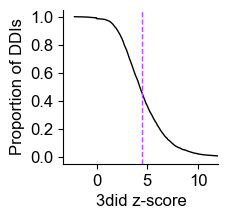

In [46]:
# Plot for z-score distribution of hetero-protein interchain DDI types

# Sort the metrics
metrics = DDI_inter_hetero_grouped_max_Score_wsc['Zscore'].sort_values()

# Calculate the cumulative distribution
cumulative = 1.0 - metrics.rank(method='first') / len(metrics)

# Plot the cumulative distribution
fig, axes = plt.subplots(figsize=(2,2))
plt.plot(metrics, cumulative, marker='', linestyle='-', color='black', linewidth=1)
plt.xticks(range(0, 15, 5))
plt.xlim(None, 12)
plt.yticks(np.arange(0, 1.2, 0.2))
axes.set_ylabel('Proportion of DDIs', fontsize= global_fontsize)
axes.set_xlabel('3did z-score', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)
axes.minorticks_off()

# Add vertical line at specific x-axis position, e.g., at x=5
x_value = 4.47
plt.axvline(x=x_value, color='#b84dff', linestyle='--', linewidth=1)

#plt.savefig(f'{save_path}hetero_protein_interchain_zscore_distribution.pdf', transparent=True, bbox_inches='tight')
plt.show()